In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import gc

In [3]:
DATA_DIR = './drive/MyDrive/aj_blogs/stockouts/'
os.listdir(DATA_DIR)

['sales_train_evaluation.csv', 'calendar.csv']

In [4]:
df_calendar = pd.read_csv(DATA_DIR+'calendar.csv', parse_dates=['date'])
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [5]:
df_stock = pd.read_csv(DATA_DIR+'sales_train_evaluation.csv')
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [6]:
df_stock.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [7]:
df_stock.item_id.unique()

array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
       'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object)

In [8]:
df_stock_filtered = df_stock[(df_stock.dept_id=='HOBBIES_2') 
& (df_stock.item_id.isin(['HOBBIES_2_001', 'HOBBIES_2_002']))
]

In [9]:
df_stock_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 416 to 27858
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 304.4+ KB


In [10]:
df_stock_melt = df_stock_filtered.melt(id_vars = ['id','item_id',
                                         'dept_id','cat_id',
                                         'store_id','state_id'])
df_stock_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38820 entries, 0 to 38819
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        38820 non-null  object
 1   item_id   38820 non-null  object
 2   dept_id   38820 non-null  object
 3   cat_id    38820 non-null  object
 4   store_id  38820 non-null  object
 5   state_id  38820 non-null  object
 6   variable  38820 non-null  object
 7   value     38820 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


In [11]:
df_stock_melt.rename(columns={'variable':'date','value':'quantity'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38820 entries, 0 to 38819
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        38820 non-null  object
 1   item_id   38820 non-null  object
 2   dept_id   38820 non-null  object
 3   cat_id    38820 non-null  object
 4   store_id  38820 non-null  object
 5   state_id  38820 non-null  object
 6   date      38820 non-null  object
 7   quantity  38820 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 2.4+ MB


In [24]:
df_stock_melt.rename(columns={'variable':'date','value':'quantity'}).head()

,id,item_id,dept_id,cat_id,store_id,state_id,date,quantity,series_id
0,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,d_1,1,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...
1,HOBBIES_2_002_CA_1_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_1,CA,d_1,4,HOBBIES_2_002_CA_1_evaluationHOBBIES_2_002HOBB...
2,HOBBIES_2_001_CA_2_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_2,CA,d_1,0,HOBBIES_2_001_CA_2_evaluationHOBBIES_2_001HOBB...
3,HOBBIES_2_002_CA_2_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_2,CA,d_1,1,HOBBIES_2_002_CA_2_evaluationHOBBIES_2_002HOBB...
4,HOBBIES_2_001_CA_3_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_3,CA,d_1,0,HOBBIES_2_001_CA_3_evaluationHOBBIES_2_001HOBB...


In [12]:
gc.collect()

0

In [13]:
df_stock_melt['series_id'] =  df_stock_melt['id']+df_stock_melt['item_id']+\
df_stock_melt['dept_id']+df_stock_melt['cat_id']+\
df_stock_melt['store_id']+df_stock_melt['state_id']

In [14]:
df_stock_melt.head()

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value,series_id
0,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,d_1,1,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...
1,HOBBIES_2_002_CA_1_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_1,CA,d_1,4,HOBBIES_2_002_CA_1_evaluationHOBBIES_2_002HOBB...
2,HOBBIES_2_001_CA_2_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_2,CA,d_1,0,HOBBIES_2_001_CA_2_evaluationHOBBIES_2_001HOBB...
3,HOBBIES_2_002_CA_2_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_2,CA,d_1,1,HOBBIES_2_002_CA_2_evaluationHOBBIES_2_002HOBB...
4,HOBBIES_2_001_CA_3_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_3,CA,d_1,0,HOBBIES_2_001_CA_3_evaluationHOBBIES_2_001HOBB...


In [15]:
df_full = df_stock_melt.merge(df_calendar, left_on=['variable'], right_on=['d'])
df_full.info()
assert df_full.shape[0]==df_stock_melt.shape[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38820 entries, 0 to 38819
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            38820 non-null  object        
 1   item_id       38820 non-null  object        
 2   dept_id       38820 non-null  object        
 3   cat_id        38820 non-null  object        
 4   store_id      38820 non-null  object        
 5   state_id      38820 non-null  object        
 6   variable      38820 non-null  object        
 7   value         38820 non-null  int64         
 8   series_id     38820 non-null  object        
 9   date          38820 non-null  datetime64[ns]
 10  wm_yr_wk      38820 non-null  int64         
 11  weekday       38820 non-null  object        
 12  wday          38820 non-null  int64         
 13  month         38820 non-null  int64         
 14  year          38820 non-null  int64         
 15  d             38820 non-null  object

In [16]:
df_full['time'] = pd.to_datetime(df_full.year.apply(str)+'-'+df_full.month.apply(str)+'-1',format='%Y-%m-%d')
df_full.head()

,id,item_id,dept_id,cat_id,store_id,state_id,variable,value,series_id,date,...,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,time
0,HOBBIES_2_001_CA_1_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_1,CA,d_1,1,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-01-29,...,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,2011-01-01
1,HOBBIES_2_002_CA_1_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_1,CA,d_1,4,HOBBIES_2_002_CA_1_evaluationHOBBIES_2_002HOBB...,2011-01-29,...,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,2011-01-01
2,HOBBIES_2_001_CA_2_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_2,CA,d_1,0,HOBBIES_2_001_CA_2_evaluationHOBBIES_2_001HOBB...,2011-01-29,...,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,2011-01-01
3,HOBBIES_2_002_CA_2_evaluation,HOBBIES_2_002,HOBBIES_2,HOBBIES,CA_2,CA,d_1,1,HOBBIES_2_002_CA_2_evaluationHOBBIES_2_002HOBB...,2011-01-29,...,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,2011-01-01
4,HOBBIES_2_001_CA_3_evaluation,HOBBIES_2_001,HOBBIES_2,HOBBIES,CA_3,CA,d_1,0,HOBBIES_2_001_CA_3_evaluationHOBBIES_2_001HOBB...,2011-01-29,...,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,2011-01-01


In [17]:
df_full.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
       'variable', 'value', 'series_id', 'date', 'wm_yr_wk', 'weekday', 'wday',
       'month', 'year', 'd', 'event_name_1', 'event_type_1', 'event_name_2',
       'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'time'],
      dtype='object')

In [18]:
df_full_monthly = df_full[['series_id','time','value']].groupby(['series_id','time'])['value']\
.sum().reset_index()
df_full_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   series_id  1300 non-null   object        
 1   time       1300 non-null   datetime64[ns]
 2   value      1300 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 30.6+ KB


In [48]:
df_full_monthly.head()

,series_id,time,value,Target
0,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-01-01,1,0
1,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-02-01,5,0
2,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-03-01,2,0
3,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-04-01,3,0
4,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-05-01,4,0


In [25]:

#!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 7.7 MB/s eta 0:00:00


In [20]:
df_full_monthly.sort_values(['series_id','time'],inplace=True)
y = df_full_monthly.groupby(['series_id'])['value'].shift(-1)

In [21]:
y_binary = pd.Series(np.where(y==0, 1, 0))
y_binary.value_counts()

0    1076
1     224
dtype: int64

In [26]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df_full_monthly.rename(columns={'series_id':'id'}), 
                             column_id="id", column_sort="time")

/usr/local/lib/python3.9/dist-packages/tsfresh/utilities/dataframe_functions.py:520: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  warnings.warn(
Rolling: 100%|██████████| 65/65 [00:03<00:00, 17.60it/s]


In [27]:
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time")
df_features.info()

Feature Extraction: 100%|██████████| 1300/1300 [01:15<00:00, 17.20it/s]


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1300 entries, ('HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBBIES_2HOBBIESCA_1CA', Timestamp('2011-01-01 00:00:00')) to ('HOBBIES_2_002_WI_3_evaluationHOBBIES_2_002HOBBIES_2HOBBIESWI_3WI', Timestamp('2016-05-01 00:00:00'))
Columns: 783 entries, value__variance_larger_than_standard_deviation to value__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(783)
memory usage: 7.8+ MB


In [28]:
df_rolled.head()

,id,time,value
0,(HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOB...,2011-01-01,1
20,(HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOB...,2011-01-01,1
21,(HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOB...,2011-02-01,5
60,(HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOB...,2011-01-01,1
61,(HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOB...,2011-02-01,5


In [29]:
y.shape, df_features.shape

((1300,), (1300, 783))

In [30]:
df_full_monthly['Target'] = y_binary

In [31]:
df_features = df_features.reset_index()
df_features.head()

,level_0,level_1,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-01-01,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-02-01,1.0,0.0,0.0,0.0,6.0,26.0,4.000000,4.000000,...,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-03-01,1.0,0.0,0.0,0.0,8.0,30.0,3.500000,0.500000,...,0.693147,0.693147,0.693147,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-04-01,1.0,0.0,0.0,0.0,11.0,39.0,2.666667,0.666667,...,1.098612,1.098612,1.098612,0.693147,-0.000000,NaN,NaN,NaN,NaN,NaN
4,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-05-01,1.0,0.0,0.0,0.0,15.0,55.0,2.250000,0.750000,...,1.098612,1.098612,1.098612,1.098612,0.693147,-0.0,NaN,NaN,NaN,NaN


In [32]:
df_full_monthly.head()

,series_id,time,value,Target
0,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-01-01,1,0
1,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-02-01,5,0
2,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-03-01,2,0
3,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-04-01,3,0
4,HOBBIES_2_001_CA_1_evaluationHOBBIES_2_001HOBB...,2011-05-01,4,0


In [33]:
df_modeling = df_features.copy(deep=True)
df_modeling = df_modeling.merge(df_full_monthly.rename(columns={'series_id':'level_0',
                                                                'time':'level_1'}), 
                                on=['level_0', 'level_1'])
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Columns: 787 entries, level_0 to Target
dtypes: datetime64[ns](1), float64(783), int64(2), object(1)
memory usage: 7.8+ MB


In [34]:
df_modeling.fillna(-10,inplace=True)
df_modeling.replace([np.inf, -np.inf], np.nan, inplace=True)
df_modeling.fillna(-1000,inplace=True)

In [35]:
df_train = df_modeling[df_modeling.level_1<pd.to_datetime('2015-01-01T00:00:00.000000000')]
df_test = df_modeling[df_modeling.level_1>=pd.to_datetime('2015-01-01T00:00:00.000000000')]
df_train.shape, df_test.shape

((960, 787), (340, 787))

In [36]:
df_test['Target'].value_counts()

0    302
1     38
Name: Target, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = df_train.drop(columns=['level_0','level_1','Target']), \
df_test.drop(columns=['level_0','level_1','Target']), df_train['Target'], df_test['Target']
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=5, max_depth=3, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
preds = bst.predict(X_test)

In [41]:
!pip install permetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from permetrics.classification import ClassificationMetric
eval = ClassificationMetric(df_test['Target'].values, preds)

In [43]:
eval.f1_score(), eval.accuracy_score()*100

(0.54178, 75.882)

In [44]:
eval.f1_score(), eval.accuracy_score(), eval.confusion_matrix()

(0.54178,
 0.75882,
 (array([[246,  56],
         [ 26,  12]]), {0: 0, 1: 1}, {0: 302, 1: 38}))

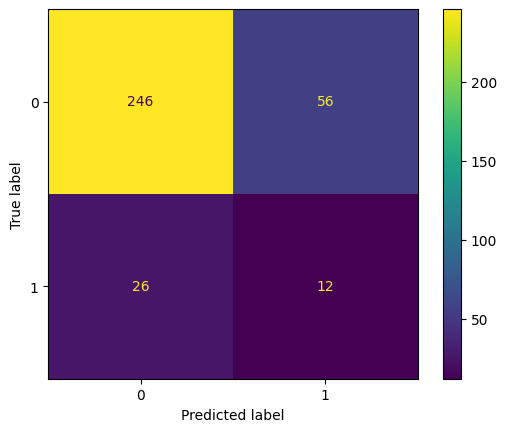

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_test['Target'].values, preds, labels=bst.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bst.classes_)
disp.plot()

In [46]:
feature_importance  = pd.DataFrame({'Feature':bst.feature_names_in_,
                                    'Importance':bst.feature_importances_})
feature_importance.sort_values(['Importance'], ascending=False, inplace=True)

In [47]:
feature_importance

,Feature,Importance
485,"value__fft_coefficient__attr_""abs""__coeff_20",0.177055
11,value__length,0.098878
236,"value__change_quantiles__f_agg_""var""__isabs_Tr...",0.092435
783,value,0.036608
667,"value__fft_aggregated__aggtype_""skew""",0.034345
...,...,...
268,"value__fft_coefficient__attr_""real""__coeff_3",0.000000
269,"value__fft_coefficient__attr_""real""__coeff_4",0.000000
272,"value__fft_coefficient__attr_""real""__coeff_7",0.000000
273,"value__fft_coefficient__attr_""real""__coeff_8",0.000000
